In [106]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model

Linear regression is a basic model that finds the best line that fits out data

In [107]:
DataFile = pd.read_csv('C:/Users/muneeba/Desktop/THESIS/DataDistributionPCA.csv')
DataFile.describe()

,Sensor ID,x-cordinate,y-cordinate,Distibution Values,0.2,0.4,0.6,0.8,1,1.2,...,.608,.609,.610,.611,.612,.613,.614,.615,.616,.617
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,32.500000,8.000000,8.000000,6.792377,8.477821e-02,8.197989e-02,7.698065e-02,7.017216e-02,6.172612e-02,5.221328e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,18.618987,4.618802,4.618802,2.142575,1.073161e-01,1.037069e-01,9.746982e-02,8.932636e-02,8.016903e-02,7.149178e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,3.349794,4.290000e-08,4.170000e-08,3.990000e-08,3.750000e-08,3.470000e-08,3.140000e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16.750000,4.500000,4.500000,5.005295,2.439750e-03,2.357000e-03,2.203250e-03,1.993750e-03,1.721250e-03,1.417000e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.500000,8.000000,8.000000,6.322161,1.965000e-02,1.895000e-02,1.760000e-02,1.570000e-02,1.390000e-02,1.230000e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.250000,11.500000,11.500000,8.545612,1.412500e-01,1.357500e-01,1.235000e-01,1.132500e-01,1.075000e-01,8.085000e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,64.000000,15.000000,15.000000,10.626946,3.290000e-01,3.200000e-01,3.090000e-01,2.970000e-01,2.830000e-01,2.680000e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
DataFile.head()

,Sensor ID,x-cordinate,y-cordinate,Distibution Values,0.2,0.4,0.6,0.8,1,1.2,...,.608,.609,.610,.611,.612,.613,.614,.615,.616,.617
0,1,1,1,7.422726,0.189000,0.184000,0.17600,0.166000,0.153000,0.139000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,3,7.929872,0.157000,0.153000,0.14600,0.138000,0.127000,0.115000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,5,8.414797,0.051500,0.050100,0.04790,0.045100,0.041600,0.037700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,7,8.869475,0.006690,0.006510,0.00622,0.005850,0.005400,0.004880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,9,9.286063,0.000579,0.000559,0.00052,0.000465,0.000396,0.000317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
DataFile=DataFile.as_matrix()
np.shape(DataFile)

(64, 839)

In [110]:
type(DataFile)

numpy.ndarray

In [111]:
DataSensors=DataFile[:,4:68] #selecting the column containing data
X=DataFile[:,0] # sensor IDs
Y=np.mean(DataSensors,axis=0) #since we have a large time span we find mean for each sensor

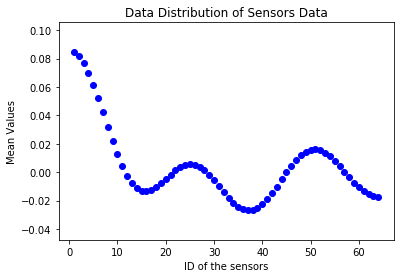

In [112]:
# Visualize our dataset
plt.scatter(X, Y,  color='blue')
plt.xlabel('ID of the sensors')
plt.ylabel('Mean Values')
plt.title('Data Distribution of Sensors Data')
plt.savefig('Data Mean Distribution')
plt.show()


In [113]:
X=np.reshape(X,(-1,1))
np.shape(X)
Y=np.reshape(Y,(-1,1))
np.shape(Y)

(64, 1)

the error is found by the the squared distance between predicted and known value. 


In [114]:
# Create linear regression scikit-learn object
model = linear_model.LinearRegression()

# Train the model using the training set
model.fit(X, Y)
Y_prime = model.predict(X)

# The mean squared error
mean_square_error = np.mean((Y_prime - Y) ** 2.0)
print("Mean squared error: {}".format(mean_square_error))

# The coefficients
print('Linear Equation: {}*x + {}'.format(model.coef_[0][0], model.intercept_[0]))

Mean squared error: 0.000504407843985753
Linear Equation: -0.0007075429844644544*x + 0.02688471290654228


now there are many methods to reduce this error i.e. loss function optimzation such as
1. Singular value decomposition (SVD) --- suitable upto 10000 data points
2. least squre methods -- one sharp
3. cholesky decomposition -- one sharp --- suitable upto 10000 data points
4. stocastic gradient decent -- iterative


sklearn has option for all of this

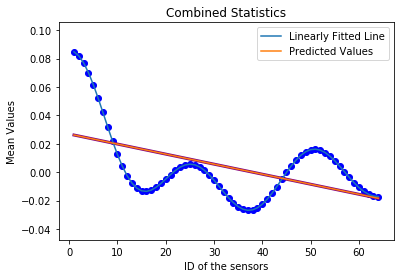

In [115]:
# Plot outputs of model
ax = plt.subplot(111)
plt.scatter(X, Y,  color='blue')
plt.title('Combined Statistics')
plt.plot(X, Y_prime, color='purple', linewidth=3)
plt.xlabel('ID of the sensors')
plt.ylabel('Mean Values')
ax.plot(X, Y, label='Linearly Fitted Line')
ax.plot(X, Y_prime, label='Predicted Values')
plt.title('Combined Statistics')
ax.legend()
plt.show()